# **DISSANAYAKA YCBJ**
# **215518X**

## Importing necessary libraries and packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df = pd.read_csv("dataset\Breast_Cancer.csv")

In [5]:
# First 5 rows of the dataset
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
# Last 5 rows of the dataset
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [7]:
# checking the num of rows and columns
df.shape

(4024, 16)

In [8]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

---

## Column Descriptions

1. **Age**  
   The age of the patient at the time of diagnosis.

2. **Race**  
   The racial/ethnic background of the patient.

3. **Marital Status**  
   The marital status of the patient (e.g., single, married, divorced).

4. **T Stage**  
   The size and extent of the primary tumor. "T" stands for "Tumor" in the TNM staging system.
   T1, T2, T3, T4: Refers to the size and/or extent of the main tumor. The higher the number after the T, the larger the tumor or the more it has grown into nearby tissues. T's may be further divided to provide more detail, such as T3a and T3b.

5. **N Stage**  
   The extent of spread to nearby lymph nodes. "N" stands for "Nodes" in the TNM staging system.
   N1, N2, N3: Refers to the number and location of lymph nodes that contain cancer. The higher the number after the N, the more lymph nodes that contain cancer.

6. **6th Stage**  
   The overall stage of cancer based on the 6th edition of the TNM staging guidelines, combining T, N, and M (Metastasis) categories.

7. **Differentiate**  
   The degree of tumor differentiation, indicating how much tumor cells differ from normal cells. Common values include:
   - Well-differentiated (low grade)
   - Moderately differentiated
   - Poorly differentiated (high grade)

8. **Grade**  
   The grade of the tumor, describing how abnormal the cancer cells look under a microscope and how quickly the tumor is likely to grow and spread.

9. **A Stage**  
   The stage of cancer defined by a specific classification system.

10. **Tumor Size**  
    The size of the tumor measured in millimeters (or other unit).

11. **Estrogen Status**  
    Indicates whether the tumor is estrogen receptor-positive (ER+) or estrogen receptor-negative (ER-). This shows if estrogen hormones fuel tumor growth.

12. **Progesterone Status**  
    Indicates whether the tumor is progesterone receptor-positive (PR+) or progesterone receptor-negative (PR-). This shows if progesterone hormones fuel tumor growth.

13. **Regional Node Examined**  
    The number of regional lymph nodes examined during surgery or treatment.

14. **Regional Node Positive**  
    The number of regional lymph nodes found to contain cancer.

15. **Survival Months**  
    The number of months the patient survived after diagnosis.

16. **Status**  
    The survival status of the patient (e.g., Alive or Dead).

---

## Checking for null values

In [9]:
# Checking for null values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

## Detecting Outliers

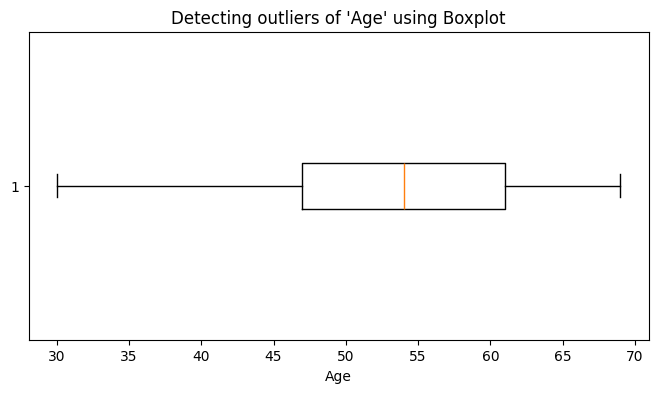

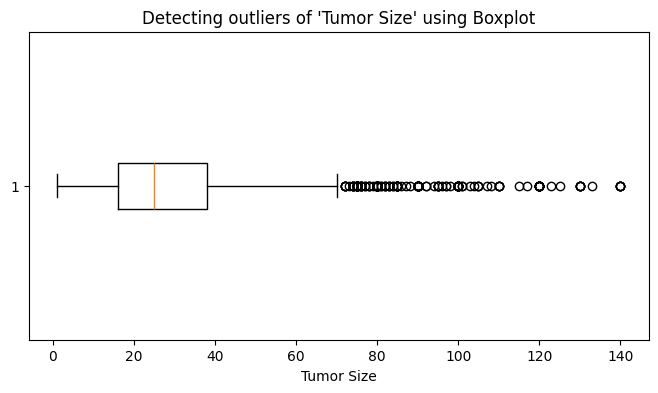

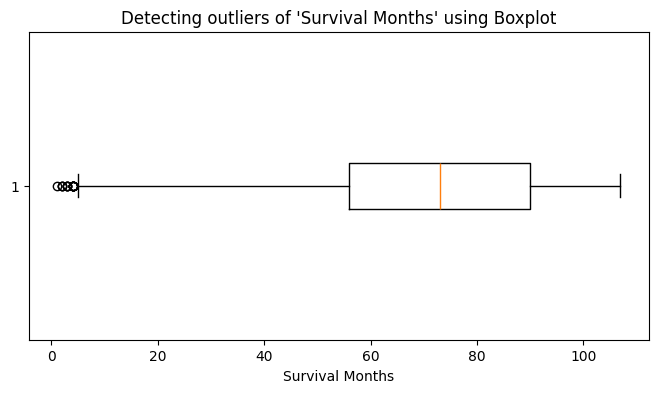

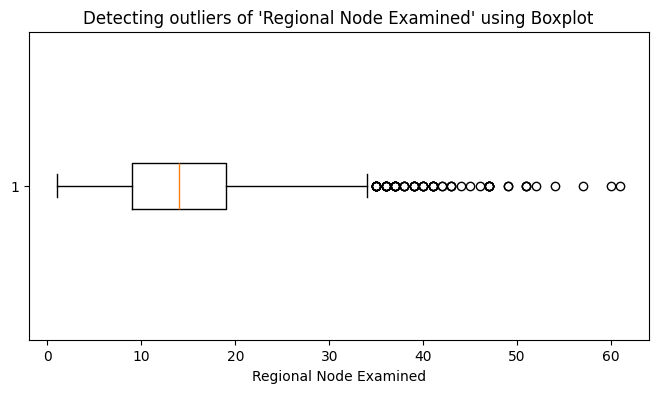

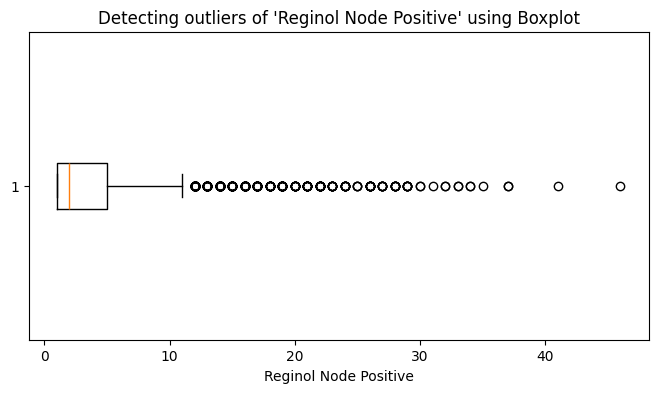

In [17]:
# List of numerical columns 
numerical_columns = ['Age','Tumor Size', 'Survival Months', 'Regional Node Examined','Reginol Node Positive']  

for column in numerical_columns:
    plt.figure(figsize=(8, 4))   
    plt.boxplot(df[column], vert=False)
    plt.title(f"Detecting outliers of '{column}' using Boxplot")
    plt.xlabel(column)
    plt.show()


In [21]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Calculating total number of outliers for each column
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    print(f"Outliers in {column}:")
    if len(outliers) > 0:
        print(f"Number of outliers in {column}: {len(outliers)}")
    else:
        print(f"No outliers in '{column}' ")
    print('-' * 40)


Outliers in Age:
No outliers in 'Age' 
----------------------------------------
Outliers in Tumor Size:
Number of outliers in Tumor Size: 222
----------------------------------------
Outliers in Survival Months:
Number of outliers in Survival Months: 18
----------------------------------------
Outliers in Regional Node Examined:
Number of outliers in Regional Node Examined: 72
----------------------------------------
Outliers in Reginol Node Positive:
Number of outliers in Reginol Node Positive: 344
----------------------------------------


## Handling Outliers

During the data preprocessing phase, I performed outlier analysis using boxplots for the numerical columns (Tumor Size, Regional Node Examined, Regional Node Positive). While analyzing the outliers, I observed the following:

**Smooth and Continuous Distribution:**
The outliers in these columns are not isolated o points but are instead smoothly distributed. This indicates that the outliers are part of a natural continuum within the dataset rather than being errors or anomalies.

**Domain Knowledge Consideration:**
In medical datasets, values that appear as outliers might represent edge cases or extreme conditions rather than incorrect entries. For example:

A tumor's unusually large size could still represent a valid observation of a patient's condition.
Higher counts of regional nodes examined or positive may reflect actual medical scenarios for specific patients.

**Impact on Analysis and Models:**
Removing these data points could Lead to a loss of valuable information, particularly when the dataset size is limited.
Bias the dataset by excluding extreme but legitimate cases, reducing the generalizability of the model.

**Model Robustness to Outliers:**
Since I am using ensemble models like Random Forest and Gradient Boosting, which are robust to outliers, retaining these values will not negatively impact the performance of the model.

**Data Integrity:**
Preserving these data points ensures that the dataset remains true to the real-world scenarios it represents, which is crucial for maintaining the integrity of the analysis and model.

**Conclusion**
Based on the above points, I have decided not to remove outliers from the dataset. Instead, I will retain them as they are likely genuine observations and play a significant role in capturing the variability and complexity of the data.

## Visualizing the Distributions

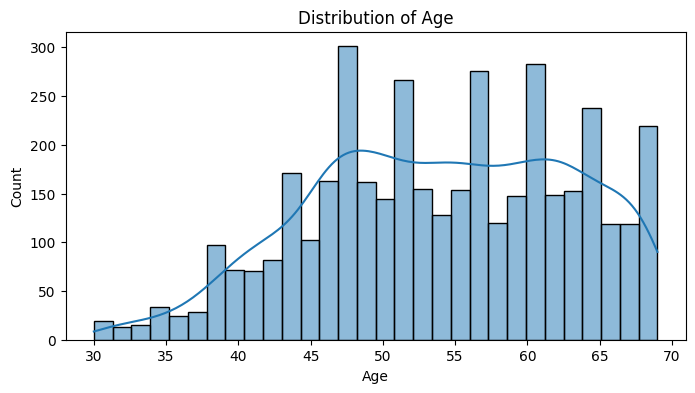

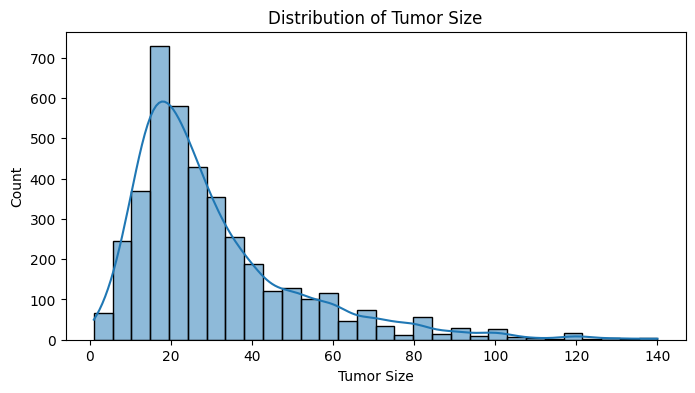

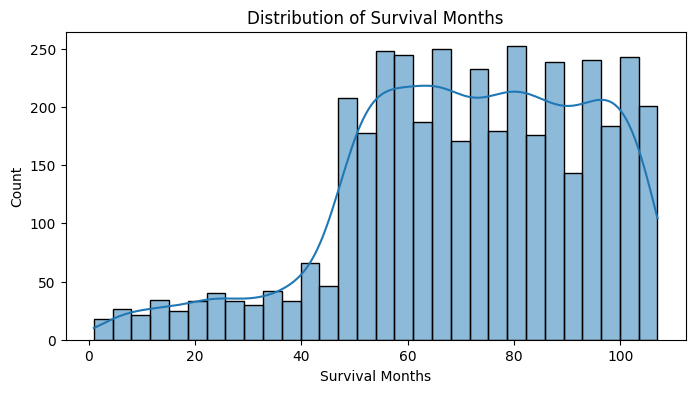

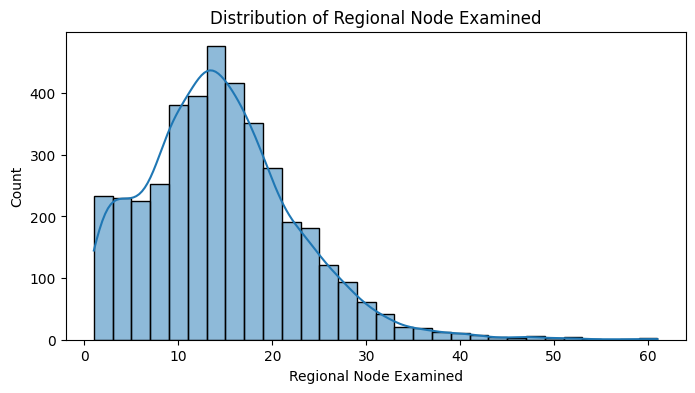

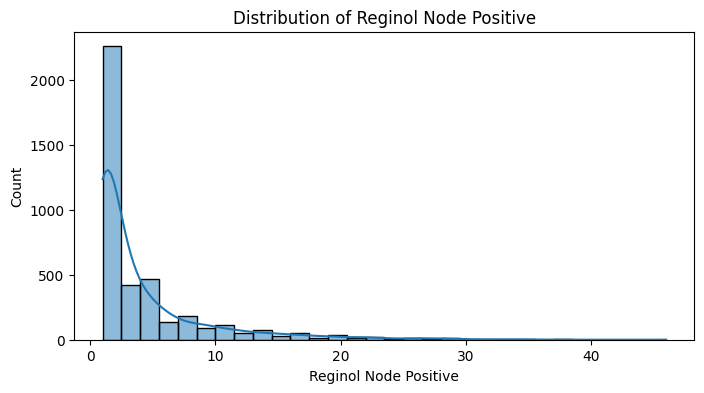

In [28]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()


## Handling Data  Transformation

During the preprocessing phase, I analyzed the distributions of the numerical columns (Age, Tumor Size, Survival Months, Regional Node Examined, Regional Node Positive). While these columns exhibit skewness , I decided not to apply log transformation or any other transformation technique. Because

**Suitability for Tree-Based Models:**
The models I intend to use (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, XGBoostClassifier) are tree-based ensemble models. These models split the data based on thresholds and are invariant to monotonic transformations (like logarithmic, square root, etc.) and scaling. This means:

Skewness in the data does not impact their performance.
The models can effectively handle raw and unscaled data.

**Preserving Interpretability:**
Transformations such as logarithmic scaling can make the data less interpretable. For instance:

A tumor size of 50 becoming log(50) may lose its intuitive meaning.
Original data values are more meaningful for understanding medical or clinical insights.

**Risk of Information Loss:**
Applying log transformation could reduce the variance in the data, potentially discarding useful information about extreme values or outliers. Since these extreme values are likely to represent real cases, preserving them in their original form ensures the integrity of the dataset.

In [29]:
# geting the list of column names
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

## Plotting Bar graphs

In [30]:
def bar_chart(feature):
    survived = df[df['Status'] == 'Alive'][feature].value_counts()
    dead = df[df['Status'] == 'Dead'][feature].value_counts()
    data = pd.DataFrame([survived, dead])
    data.index = ['Alive', 'Dead']
    data.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

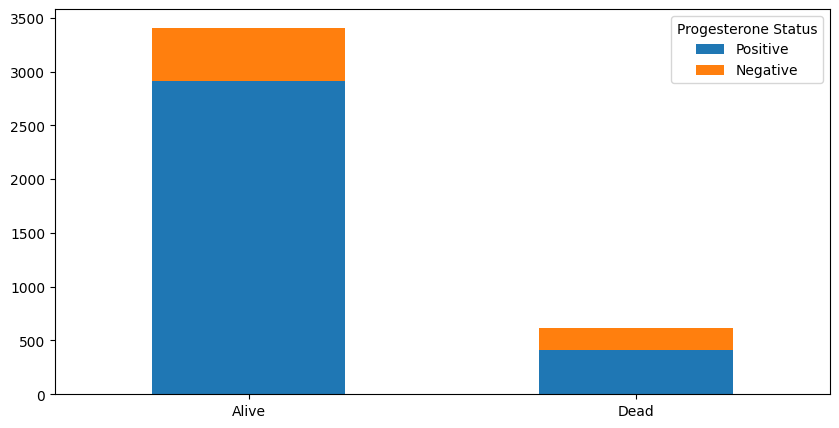

In [31]:
bar_chart('Progesterone Status')

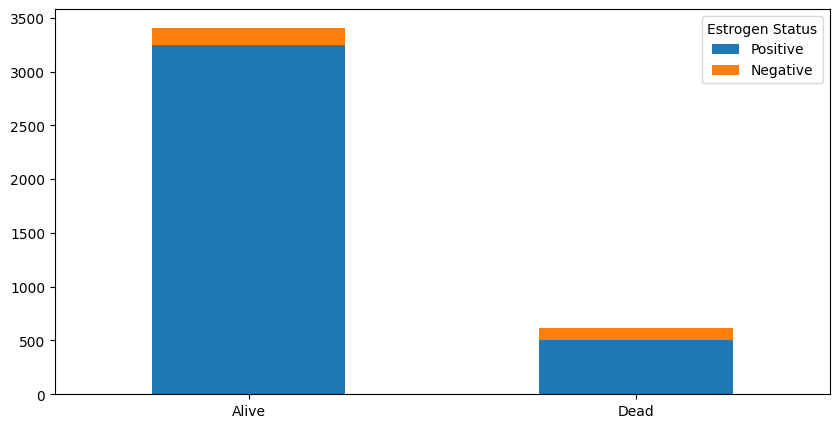

In [32]:
bar_chart('Estrogen Status')

In [33]:
# Reformating column 'T Stage '
df['T Stage']=df['T Stage ']

In [34]:
# Removing original column after renaming
df.drop(columns='T Stage ', inplace=True)

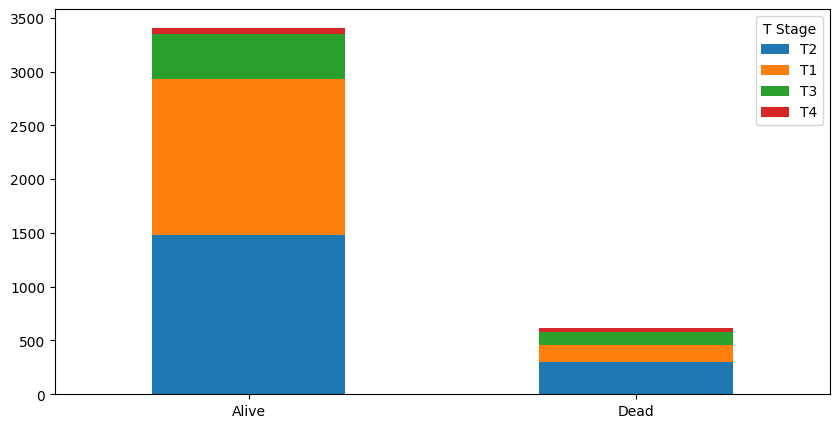

In [35]:
bar_chart('T Stage')

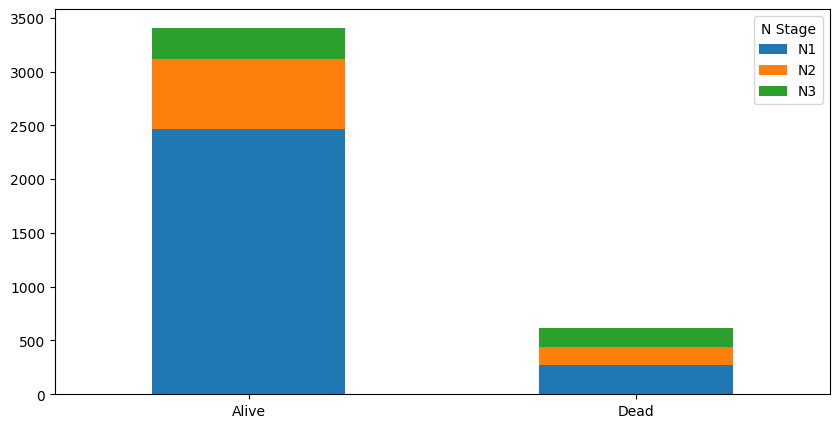

In [36]:
bar_chart('N Stage')

<Axes: xlabel='Status', ylabel='count'>

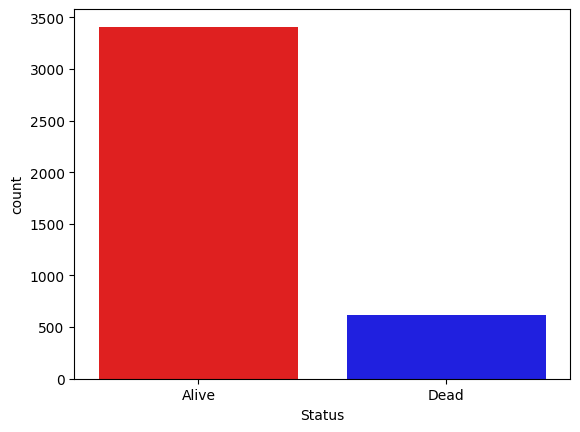

In [37]:
sns.countplot(x='Status', data=df, palette=['r','b'])

## Checking unique values of columns

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   N Stage                 4024 non-null   object
 4   6th Stage               4024 non-null   object
 5   differentiate           4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
 15  T St

In [39]:
df['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [40]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [41]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [42]:
df['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [43]:
df['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [44]:
df['Grade'] = df['Grade'].replace(['1','2','3',' anaplastic; Grade IV'],[1,2,3,4])

In [45]:
df['Grade'].unique()

array([3, 2, 1, 4])

In [46]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [47]:
df['differentiate'] = df['differentiate'].replace(['Poorly differentiated','Moderately differentiated', 
                                                 'Well differentiated',], ['Poorly', 'Moderately', 'Well'])

In [48]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,Positive,Positive,3,1,50,Alive,T2


## Encoding Categorical Features

In [49]:
la = LabelEncoder()
df['Progesterone Status'] = la.fit_transform(df['Progesterone Status'])
df['Estrogen Status'] = la.fit_transform(df['Estrogen Status'])

In [50]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,Alive,T2


In [51]:
# encoding status
df['Status'] = df['Status'].replace(['Alive', 'Dead'], [1,0])

In [52]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,1,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,1,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,1,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,1,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,1,T2


In [53]:
df['T Stage']

0       T1
1       T2
2       T3
3       T1
4       T2
        ..
4019    T1
4020    T2
4021    T2
4022    T2
4023    T2
Name: T Stage, Length: 4024, dtype: object

In [54]:
df['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [55]:
# Encoding T Status
df['T Stage'] = df['T Stage'].replace(['T1', 'T2', 'T3', 'T4'], [1, 2, 3, 4])

In [56]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,1,1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,1,2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,1,3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,1,1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,1,2


## Feature Scaling 

In [57]:
st = StandardScaler()
df['Survival Months'] = st.fit_transform(df['Survival Months'].values.reshape(-1,1))
df['Tumor Size'] = st.fit_transform(df['Tumor Size'].values.reshape(-1, 1))
df['Regional Node Examined'] = st.fit_transform(df['Regional Node Examined'].values.reshape(-1, 1))

In [58]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,58,White,Married,N1,IIA,Poorly,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,47,White,Married,N1,IIB,Poorly,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [59]:
df['Age'] = la.fit_transform(df['Age'])

In [60]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,N1,IIA,Poorly,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,N2,IIIA,Moderately,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,N3,IIIC,Moderately,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,N1,IIA,Poorly,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,N1,IIB,Poorly,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [61]:
df['differentiate'].unique()

array(['Poorly', 'Moderately', 'Well', 'Undifferentiated'], dtype=object)

In [62]:
df['differentiate'] = df['differentiate'].replace(['Poorly','Moderately', 'Well','Undifferentiated'], [1, 2, 3, 4])

In [63]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,N1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,N2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,N3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,N1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,N1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [64]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [65]:
df['N Stage'] = df['N Stage'].replace(['N1','N2', 'N3'], [1, 2, 3])

In [66]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [67]:
# One-Hot Encoding for 'Race' and 'Marital Status'
df = pd.get_dummies(df, columns=['Race', 'Marital Status'], drop_first=True)

In [68]:
df.head()

,Age,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,38,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1,False,True,True,False,False,False
1,20,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2,False,True,True,False,False,False
2,28,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3,False,True,False,False,False,False
3,28,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1,False,True,True,False,False,False
4,17,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2,False,True,True,False,False,False


In [69]:
df['6th Stage'] = la.fit_transform(df['6th Stage'])

In [70]:
df.head()

,Age,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,38,1,0,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1,False,True,True,False,False,False
1,20,2,2,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2,False,True,True,False,False,False
2,28,3,4,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3,False,True,False,False,False,False
3,28,1,0,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1,False,True,True,False,False,False
4,17,1,1,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2,False,True,True,False,False,False


In [71]:
df['A Stage'] = la.fit_transform(df['A Stage'])

In [72]:
df.head()

,Age,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,38,1,0,1,3,1,-1.253661,1,1,1.190676,1,-0.492961,1,1,False,True,True,False,False,False
1,20,2,2,2,2,1,0.214345,1,1,-0.044095,5,-0.405695,1,2,False,True,True,False,False,False
2,28,3,4,2,2,1,1.540287,1,1,-0.044095,7,0.161530,1,3,False,True,False,False,False,False
3,28,1,0,1,3,1,-0.590691,1,1,-1.525820,1,0.554224,1,1,False,True,True,False,False,False
4,17,1,1,1,3,1,0.498475,1,1,-1.402343,1,-0.929288,1,2,False,True,True,False,False,False


## Plotting Corelation Heatmap

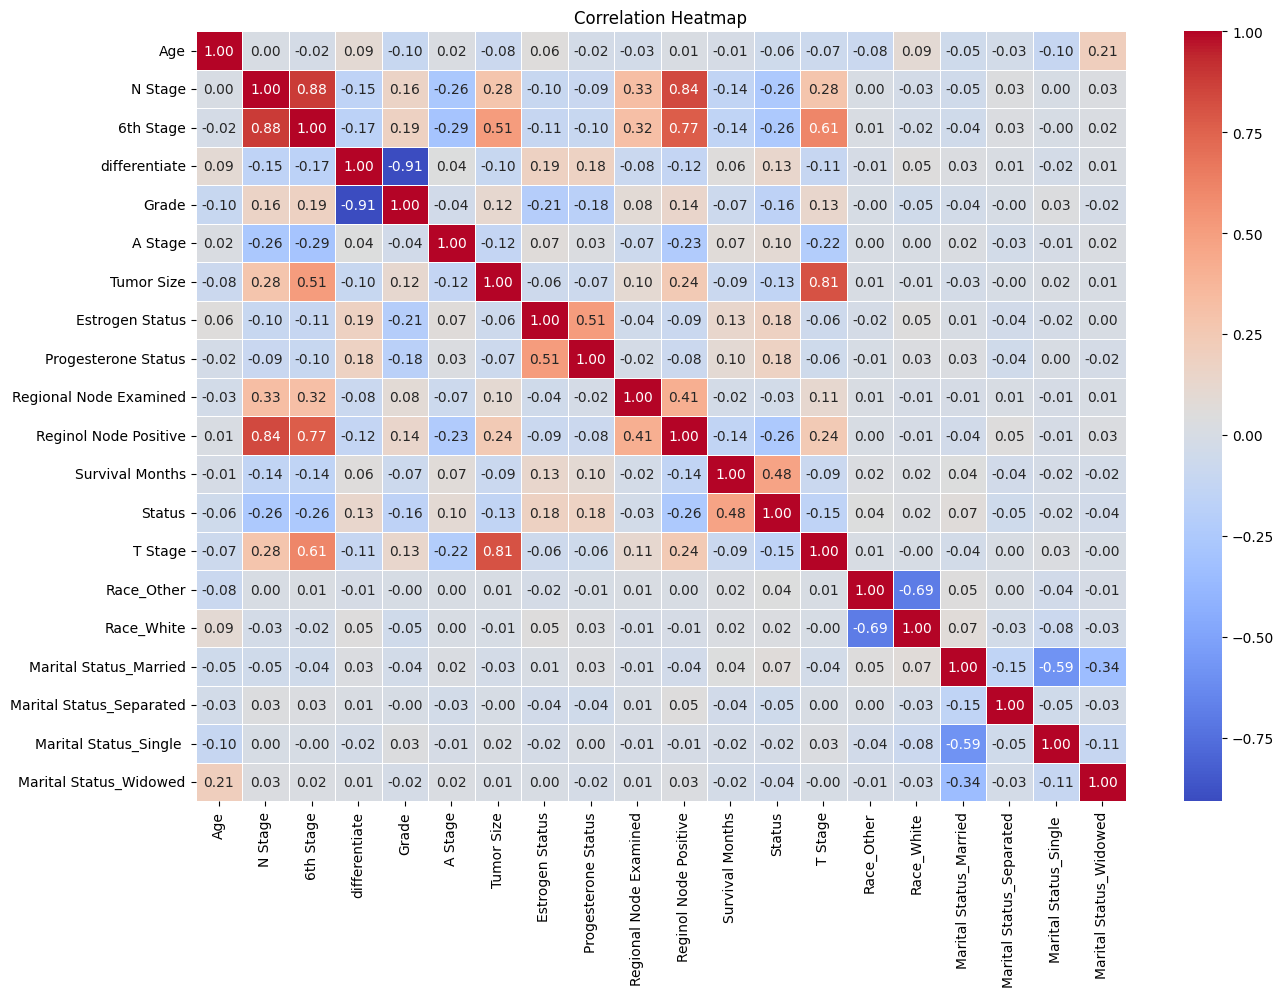

In [73]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## K-Fold Cross Validation

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=40)

In [75]:
# Seperating the dataset for train and test
x = df.drop('Status',axis=1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

## Hyperparameter Tuning

### RandomForestClassifier

In [116]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "max_features": [3, 5, "sqrt"],
    "min_samples_split": [2, 5, 10]
}

# Initialize the GridSearchCV
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=rf_param_grid,
                       cv=5, scoring='accuracy', verbose=2)

# Fit the GridSearchCV
rf_grid.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Score for Random Forest:", rf_grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; t

### GradientBoostingClassifier

In [117]:
# Define parameter grid
gb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10],
    "subsample": [0.7, 0.9, 1.0]
}

# Initialize the GridSearchCV
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                       param_grid=gb_param_grid,
                       cv=5, scoring='accuracy', verbose=2)

# Fit the GridSearchCV
gb_grid.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best Score for Gradient Boosting:", gb_grid.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END

### AdaBoostClassifier

In [118]:
# Define parameter grid
ada_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2, 0.5]
}

# Initialize the GridSearchCV
ada_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                        param_grid=ada_param_grid,
                        cv=5, scoring='accuracy', verbose=2)

# Fit the GridSearchCV
ada_grid.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for AdaBoost:", ada_grid.best_params_)
print("Best Score for AdaBoost:", ada_grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_es

### XGBClassifier

In [119]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

# Initialize the RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
                                param_distributions=xgb_param_grid,
                                n_iter=50, cv=5, scoring='accuracy', verbose=2, random_state=42)

# Fit the RandomizedSearchCV
xgb_random.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for XGBoost:", xgb_random.best_params_)
print("Best Score for XGBoost:", xgb_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, le

In [76]:
from sklearn.metrics import classification_report

In [77]:
# Can be used to train, validate and generate classification reports
def all(model):
    model.fit(x_train,y_train.astype(int))
    pre = model.predict(x_test)
    print(confusion_matrix(pre, y_test.astype(int)))
    print(classification_report(pre, y_test.astype(int)))
    print('score_test = ', model.score(x_test, y_test.astype(int))*100)
    print('score_train = ', model.score(x_train, y_train.astype(int))*100)

## Training Multiple models one after another

In [121]:
# Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 50}
model_1 = RandomForestClassifier(n_estimators=200, max_depth=50)
all(model_1)

[[ 242   58]
 [ 251 2669]]
              precision    recall  f1-score   support

           0       0.49      0.81      0.61       300
           1       0.98      0.91      0.95      2920

    accuracy                           0.90      3220
   macro avg       0.73      0.86      0.78      3220
weighted avg       0.93      0.90      0.91      3220

score_test =  90.40372670807454
score_train =  100.0


In [97]:
model_2 = GradientBoostingClassifier()
all(model_2)

[[ 245   75]
 [ 248 2652]]
              precision    recall  f1-score   support

           0       0.50      0.77      0.60       320
           1       0.97      0.91      0.94      2900

    accuracy                           0.90      3220
   macro avg       0.73      0.84      0.77      3220
weighted avg       0.93      0.90      0.91      3220

score_test =  89.96894409937887
score_train =  94.15422885572139


In [98]:
model_3 = AdaBoostClassifier()
all(model_3)

[[ 246  100]
 [ 247 2627]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59       346
           1       0.96      0.91      0.94      2874

    accuracy                           0.89      3220
   macro avg       0.73      0.81      0.76      3220
weighted avg       0.91      0.89      0.90      3220

score_test =  89.22360248447205
score_train =  90.67164179104478


In [99]:
model_4 = XGBClassifier()
all(model_4)

[[ 246  114]
 [ 247 2613]]
              precision    recall  f1-score   support

           0       0.50      0.68      0.58       360
           1       0.96      0.91      0.94      2860

    accuracy                           0.89      3220
   macro avg       0.73      0.80      0.76      3220
weighted avg       0.91      0.89      0.90      3220

score_test =  88.7888198757764
score_train =  100.0


## Creating Ensemble Model

In [100]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42 ,max_depth=4  , max_features=6)
clf2 = XGBClassifier(max_depth = 4 , learning_rate = 0.02 ,  n_estimators= 50, random_state=42 , max_features= 6 )
clf3 = GradientBoostingClassifier(n_estimators= 50, learning_rate=0.03, random_state=42 ,max_depth=3  , max_features=6 )
clf4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.03)

In [101]:
# Combing predictions from multiple classifiers
v_clf = VotingClassifier(estimators=[("RandomForest" , clf1) , ('XGB' , clf2) ,
                                     ("GradientBoosting" , clf3) ,("AdaBoost" , clf4)] , voting = "soft")

In [102]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(max_depth=4,
                                                     max_features=6,
                                                     random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma...
                                            max_features=6, max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_features=6,
                                                         n_estimators=50,
                                                         random_state=42)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=0.03,
                                                 n_estimators=100))],
                 voting='soft')

## Ensemble model evaluation

In [103]:
y_pred = v_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('score_test = ', v_clf.score(x_test, y_test.astype(int))*100)
print('score_train = ', v_clf.score(x_train, y_train.astype(int))*100)

[[ 201  292]
 [  33 2694]]
score_test =  89.90683229813664
score_train =  90.79601990049751


In [104]:
v_clf.score(x_test , y_test)

0.8990683229813664

In [105]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 89.90683229813664
[[ 201  292]
 [  33 2694]]
True Positive: 2694
True Negative: 201
False Positive: 292
False Negative: 33
precision_score1: 0.9022103148024112
precision_score2: 0.9022103148024112
recall_score: 0.9878987898789879
recall_score: 0.9878987898789879


## AUC and ROC curves

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score

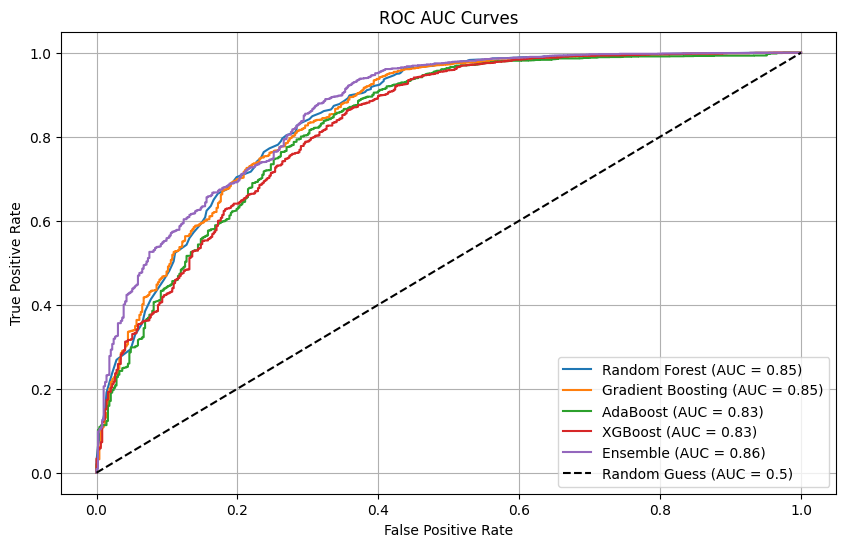

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot the ROC curve
def plot_roc_curve(models, x_test, y_test):
    plt.figure(figsize=(10, 6))
    
    for name, model in models:
        # Get predicted probabilities for the positive class
        y_proba = model.predict_proba(x_test)[:, 1]
        
        # Compute FPR, TPR, and threshold values
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        
        # Compute AUC
        auc_score = roc_auc_score(y_test, y_proba)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    
    # Plot the random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Curves")
    plt.legend()
    plt.grid()
    plt.show()

# List of models to evaluate
models = [
    ("Random Forest", model_1),
    ("Gradient Boosting", model_2),
    ("AdaBoost", model_3),
    ("XGBoost", model_4),  
    ("Ensemble", v_clf)
]

# Plot the ROC curves
plot_roc_curve(models, x_test, y_test)


### Justification for Using an Ensemble Model

An ensemble model combines the predictions of multiple base models (Random Forest, XGBoost, Gradient Boosting, and AdaBoost) to leverage their individual strengths and mitigate their weaknesses. This approach reduces bias, variance, and overfitting, leading to more robust and generalized predictions.

In this case, the ensemble model outperformed individual classifiers with the highest AUC score, demonstrating its superior ability to balance sensitivity and specificity. This makes it the most reliable choice for accurately predicting outcomes in diverse data scenarios.

In [77]:
import joblib

# Save the model
joblib.dump(v_clf, 'ensemble_model.pkl')


['ensemble_model.pkl']

## Loading the trained model

In [2]:
import joblib
model = joblib.load('ensemble_model.pkl')

In [ ]:
# 'Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
#        'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
#        'Progesterone Status', 'Regional Node Examined',
#        'Reginol Node Positive', 'Survival Months', 'Status'
user_input = {
  "age" : 10 ,
  "Race" : "",
  "Marital Status" : "",
  "T Stage" : "",
  "N Stage" : "",
  "6th Stage" : "",
  "differentiate" : "",
  "Grade" : "",
  "A Stage" : "",
  "Tumor Size" : 10,
  "Estrogen Status" : "",
  "Progesterone Status" : "",
  "Regional Node Examined" : 10,
  "Reginol Node Positive" : 10,
  "Survival Months" : 10
}
def model_test(user_input):
  
    
  # Convert the user input dictionary to a DataFrame
  user_df = pd.DataFrame([user_input])

  # Predict using the trained model
  probabilities = model.predict_proba(user_df)
  print("Survival Probabilities:", probabilities)

  predictions = model.predict(user_df)
  print("Predicted Class:", predictions)








ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Marital Status
- Race
- age
Feature names seen at fit time, yet now missing:
- Age
- Marital Status_Married
- Marital Status_Separated
- Marital Status_Single 
- Marital Status_Widowed
- ...
